# K-Means Clustering for Customer Segmentation

**Objective:** Apply K-Means clustering to segment customers into distinct groups based on their characteristics.

**What is K-Means?**
- **Partitioning algorithm:** Divides data into k non-overlapping clusters
- **Hard assignment:** Each point belongs to exactly one cluster
- **Centroid-based:** Clusters formed around cluster centers (centroids)
- **Iterative:** Refines clusters until convergence

**Use Case:** Group customers by:
- Demographics (Age, Gender, Family Size)
- Financial (Annual Income, Work Experience)
- Behavior (Spending Score)
- Profession

**Key Steps:**
1. Load preprocessed customer data
2. Find optimal k using Elbow Method
3. Fit K-Means model
4. Visualize and analyze clusters
5. Evaluate clustering quality
6. Make predictions for new customers


In [ ]:
# Import necessary libraries for K-Means clustering
import pandas as pd  # Data manipulation
from sklearn.cluster import KMeans  # K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # Feature scaling (not used in this notebook)
from sklearn.decomposition import PCA  # Dimensionality reduction for visualization
import matplotlib.pyplot as plt  # Visualization
from sklearn.metrics import silhouette_score  # Clustering evaluation metric
from sklearn.metrics import davies_bouldin_score  # Clustering evaluation metric

In [ ]:
# Load the preprocessed customer data
# Data is already cleaned, encoded, and ready for clustering
data = pd.read_csv('../Data/CustomersCleaned.csv')

In [4]:
# scaler = jb.load("AnnualIncomeScaler.joblib")
# data["Annual Income"] = scaler.inverse_transform(
#     data["Annual Income"].values.reshape(-1, 1)
# )

## Step 1: Find Optimal Number of Clusters (Elbow Method)

**Elbow Method:**
- Plot the **inertia** (within-cluster sum of squares) for different values of k
- Look for the "elbow" point where inertia starts decreasing more slowly
- This indicates the optimal number of clusters
- **Inertia** measures how tightly grouped the clusters are (lower is better)


In [5]:
data.head()

,Gender,Age,Annual Income,Spending Score (1-100),Work Experience,Family Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,39,1,4,False,False,False,False,True,False,False,False
1,1,21,35000,81,3,3,False,True,False,False,False,False,False,False
2,0,20,86000,6,1,1,False,True,False,False,False,False,False,False
3,0,23,59000,77,0,2,False,False,False,False,False,False,True,False
4,0,31,38000,40,2,6,False,False,True,False,False,False,False,False


## Step 2: Fit K-Means with Optimal Number of Clusters

Based on the elbow method, we select **k=3** as the optimal number of clusters.


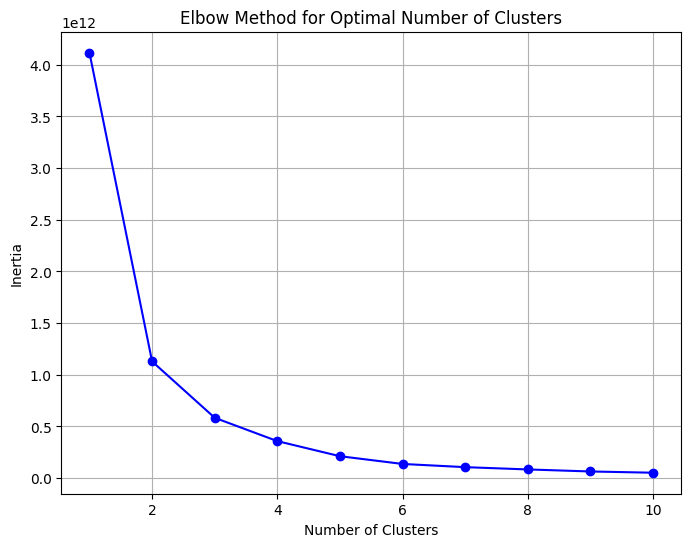

In [6]:
inertia = []
num_clusters = range(1, 11)

for k in num_clusters:
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=0)
    kmeans.fit(data)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(8, 6))
plt.plot(num_clusters, inertia, marker="o", linestyle="-", color="b")
plt.grid(True)
plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

## Step 3: Visualize Clusters with PCA

Since we have multiple dimensions (14 features), we use PCA to reduce to 2D for visualization.


In [7]:
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=42)
data["Cluster"] = kmeans.fit_predict(data)

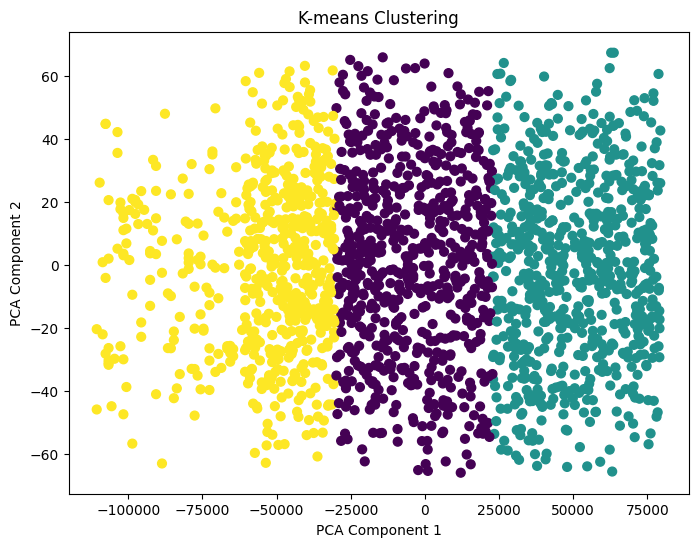

In [8]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data["Cluster"], cmap="viridis", s=40)
plt.title("K-means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [9]:
data.head()

,Gender,Age,Annual Income,Spending Score (1-100),Work Experience,Family Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Cluster
0,1,19,15000,39,1,4,False,False,False,False,True,False,False,False,2
1,1,21,35000,81,3,3,False,True,False,False,False,False,False,False,2
2,0,20,86000,6,1,1,False,True,False,False,False,False,False,False,0
3,0,23,59000,77,0,2,False,False,False,False,False,False,True,False,2
4,0,31,38000,40,2,6,False,False,True,False,False,False,False,False,2


In [10]:
data.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score (1-100)',
       'Work Experience', 'Family Size', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing', 'Cluster'],
      dtype='object')

In [11]:
data = data[['Gender', 'Age', 'Annual Income', 'Spending Score (1-100)',
        'Work Experience', 'Family Size', 'Cluster', 'Profession_Doctor',
        'Profession_Engineer', 'Profession_Entertainment',
        'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
        'Profession_Lawyer', 'Profession_Marketing']]

In [12]:
data.head()

,Gender,Age,Annual Income,Spending Score (1-100),Work Experience,Family Size,Cluster,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,19,15000,39,1,4,2,False,False,False,False,True,False,False,False
1,1,21,35000,81,3,3,2,False,True,False,False,False,False,False,False
2,0,20,86000,6,1,1,0,False,True,False,False,False,False,False,False
3,0,23,59000,77,0,2,2,False,False,False,False,False,False,True,False
4,0,31,38000,40,2,6,2,False,False,True,False,False,False,False,False


# Exploration

In [30]:
data.loc[data['Cluster'] == 0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,687.0,0.436681,0.496336,0.0,0.0,0.0,1.0,1.0
Age,687.0,51.053857,28.902647,0.0,26.0,52.0,77.0,99.0
Annual Income,687.0,105624.989811,15474.589148,80783.0,92000.0,104582.0,118564.5,133400.0
Spending Score (1-100),687.0,51.553130,28.298693,1.0,28.0,50.0,76.0,100.0
Work Experience,687.0,4.098981,3.798356,0.0,1.0,4.0,7.0,15.0
Family Size,687.0,3.768559,1.955854,1.0,2.0,4.0,5.0,7.0
Cluster,687.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [14]:
data.loc[data['Cluster'] == 1].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,690.0,0.395652,0.489345,0.0,0.0,0.0,1.0,1.0
Age,690.0,48.469565,29.546300,0.0,22.0,48.0,75.0,99.0
Annual Income,690.0,161459.260870,16386.230518,133551.0,147263.0,161429.0,175144.5,189974.0
Spending Score (1-100),690.0,52.340580,27.560751,1.0,31.0,51.0,77.0,100.0
Work Experience,690.0,4.307246,3.979422,0.0,1.0,4.0,8.0,15.0
Family Size,690.0,3.937681,1.997938,1.0,2.0,4.0,6.0,8.0
Cluster,690.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [15]:
data.loc[data['Cluster'] == 2].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gender,578.0,0.384083,0.486799,0.0,0.00,0.0,1.00,1.0
Age,578.0,46.974048,26.316518,0.0,26.25,44.0,68.00,99.0
Annual Income,578.0,55886.442907,20171.568828,0.0,50286.50,61326.5,70355.25,80605.0
Spending Score (1-100),578.0,49.216263,27.913023,0.0,25.00,49.0,73.00,100.0
Work Experience,578.0,3.614187,3.668443,0.0,1.00,2.0,7.00,15.0
Family Size,578.0,3.529412,1.930329,1.0,2.00,3.0,5.00,9.0
Cluster,578.0,2.000000,0.000000,2.0,2.00,2.0,2.00,2.0


In [16]:
data.groupby("Cluster")[["Age", "Annual Income", "Spending Score (1-100)"]].agg(["mean", "min", "max"]).round(2)

Age         Annual Income                 Spending Score (1-100)  \
          mean min max          mean     min     max                   mean   
Cluster                                                                       
0        51.05   0  99     105624.99   80783  133400                  51.55   
1        48.47   0  99     161459.26  133551  189974                  52.34   
2        46.97   0  99      55886.44       0   80605                  49.22   

                  
        min  max  
Cluster           
0         1  100  
1         1  100  
2         0  100

# Evaluation 

In [17]:
X = data.drop(columns=["Cluster"])
labels = kmeans.labels_

score = silhouette_score(X, labels)
print("Silhouette Score:", score.round(2))

score = davies_bouldin_score(X, labels)
print("Davies-Bouldin Index:", score.round(2))

Silhouette Score: 0.56
Davies-Bouldin Index: 0.56


Silhouette Score: 0.56 A score above 0.5 generally indicates well-defined and distinct clusters.
Davies-Bouldin Index: 0.56 score below 1 is considered good and indicates compact, well-separated clusters.

# -----------------------------------------------------------------

# New values

In [18]:
new_data = pd.DataFrame(
    {
        "Gender": ["Male"],
        "Age": [60],
        "Annual Income": [98893],
        "Spending Score (1-100)": [80],
        "Work Experience": [5],
        "Family Size": [6],
        "Profession": ["Engineer"],
    }
)
# 80783

In [19]:
data.groupby("Cluster")[["Age", "Annual Income", "Spending Score (1-100)"]].agg(["mean", "min", "max"]).round(2)

Age         Annual Income                 Spending Score (1-100)  \
          mean min max          mean     min     max                   mean   
Cluster                                                                       
0        51.05   0  99     105624.99   80783  133400                  51.55   
1        48.47   0  99     161459.26  133551  189974                  52.34   
2        46.97   0  99      55886.44       0   80605                  49.22   

                  
        min  max  
Cluster           
0         1  100  
1         1  100  
2         0  100

In [20]:
new_data[['Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment',
            'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
            'Profession_Lawyer', 'Profession_Marketing']] = False

In [21]:
new_columns = pd.get_dummies(new_data['Profession'], columns=["Profession"], drop_first=False)
new_data = new_data.drop(columns=['Profession'])

In [22]:
new_columns.columns

Index(['Engineer'], dtype='object')

In [23]:
for col in new_columns.columns:
	new_columns[f"Profession_{col}"] = new_columns[col]
	del new_columns[col]

new_columns
new_data[new_columns.columns] = new_columns[new_columns.columns]

In [24]:
data.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score (1-100)',
       'Work Experience', 'Family Size', 'Cluster', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'],
      dtype='object')

In [25]:
new_data.columns

Index(['Gender', 'Age', 'Annual Income', 'Spending Score (1-100)',
       'Work Experience', 'Family Size', 'Profession_Doctor',
       'Profession_Engineer', 'Profession_Entertainment',
       'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker',
       'Profession_Lawyer', 'Profession_Marketing'],
      dtype='object')

In [26]:
new_data['Gender'] = new_data['Gender'].str.lower().map({'female': 0, 'male': 1})

In [27]:
new_data.head(2)

,Gender,Age,Annual Income,Spending Score (1-100),Work Experience,Family Size,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,1,60,98893,80,5,6,False,True,False,False,False,False,False,False


# Make prediction 

In [28]:
new_data["Cluster"] = kmeans.predict(new_data)

In [29]:
print(f"This customer will be in the cluster number : {new_data["Cluster"].iloc[0]}")

This customer will be in the cluster number : 0
